## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [13]:
# TODO
#1
import pandas as pd

file_path = "C:\\Users\\nanis\\PycharmProjects\\SSBU_25\\cv4\\heart_failure_clinical_records_dataset.csv"

data_hf = pd.read_csv(file_path)
print(data_hf.head())


#2
file_path = "heart_failure_clinical_records_dataset.csv"
data_hf = pd.read_csv(file_path)

contains_na = data_hf.isna().any().any()

if contains_na:
    print("Áno, dataset obsahuje chýbajúce hodnoty (NA).")
else:
    print("Nie, dataset neobsahuje chýbajúce hodnoty (NA).")

#3
selected_columns = ["age", "anaemia", "high_blood_pressure", "serum_sodium", "DEATH_EVENT"]
print(data_hf[selected_columns].dtypes)

#4

duplicates = data_hf.duplicated().sum()
if duplicates > 0:
    print(f"Áno, dataset obsahuje {duplicates} duplicitných záznamov.")
else:
    print("Nie, dataset neobsahuje duplicitné záznamy.")




    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

**Obsahuje dataset duplicitné záznamy?**

### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [15]:
# TODO
#1
sex_counts = data_hf["sex"].value_counts()
print(f"Počet žien (0): {sex_counts[0]}")
print(f"Počet mužov (1): {sex_counts[1]}")

#2
non_smokers = data_hf[data_hf["smoking"] == 0]["sex"].value_counts()
print(f"Počet nefajčiarov žien: {non_smokers.get(0, 0)}")
print(f"Počet nefajčiarov muži: {non_smokers.get(1, 0)}")



Počet žien (0): 105
Počet mužov (1): 194
Počet nefajčiarov medzi ženami (0): 101
Počet nefajčiarov medzi mužmi (1): 102


**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [17]:
# TODO
#1
min_age = data_hf["age"].min()
max_age = data_hf["age"].max()
mean_age = data_hf["age"].mean()

print(f"Minimálny vek pacienta: {min_age}")
print(f"Maximálny vek pacienta: {max_age}")
print(f"Priemerný vek pacientov: {mean_age:.2f}")


#2
most_common_age = data_hf["age"].mode()[0]
count_most_common = (data_hf["age"] == most_common_age).sum()
print(f"Najčastejší vek v datasetu: {most_common_age} rokov (vyskytuje sa {count_most_common} krát)")



Minimálny vek pacienta: 40.0
Maximálny vek pacienta: 95.0
Priemerný vek pacientov: 60.83
Najčastejší vek v datasetu: 60.0 rokov (vyskytuje sa 33 krát)


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

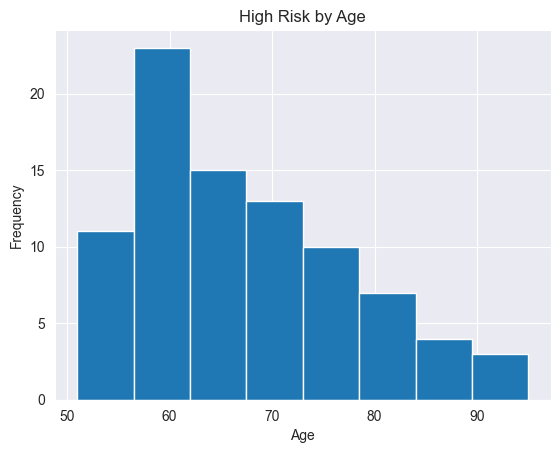

In [19]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

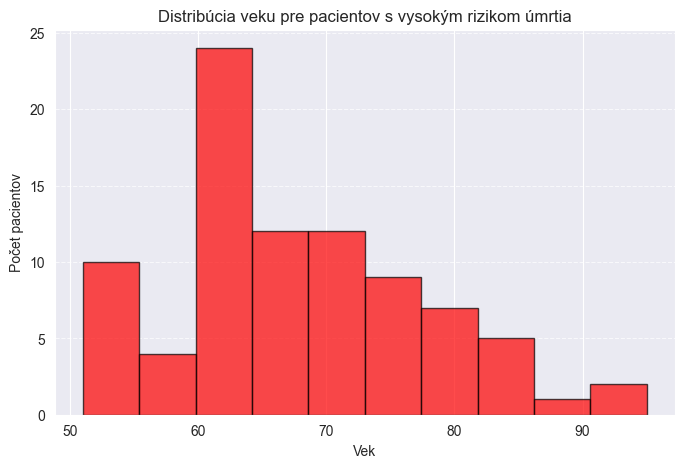

Najčastejší vek pacientov s vysokým rizikom: 60.0 rokov
Počet pacientov v tomto veku: 18


In [22]:
# TODO

import matplotlib.pyplot as plt

#1
high_risk = data_hf[data_hf['risk'] == 'High']


plt.figure(figsize=(8, 5))
plt.hist(high_risk['age'], bins=10, color='red', alpha=0.7, edgecolor='black')


plt.title('Distribúcia veku pre pacientov s vysokým rizikom úmrtia')
plt.xlabel('Vek')
plt.ylabel('Počet pacientov')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()




#2
most_common_high_risk_age = high_risk["age"].mode()[0]

#3
count_most_common_high_risk_age = (high_risk["age"] == most_common_high_risk_age).sum()
print(f"Najčastejší vek pacientov s vysokým rizikom: {most_common_high_risk_age} rokov")
print(f"Počet pacientov v tomto veku: {count_most_common_high_risk_age}")


**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


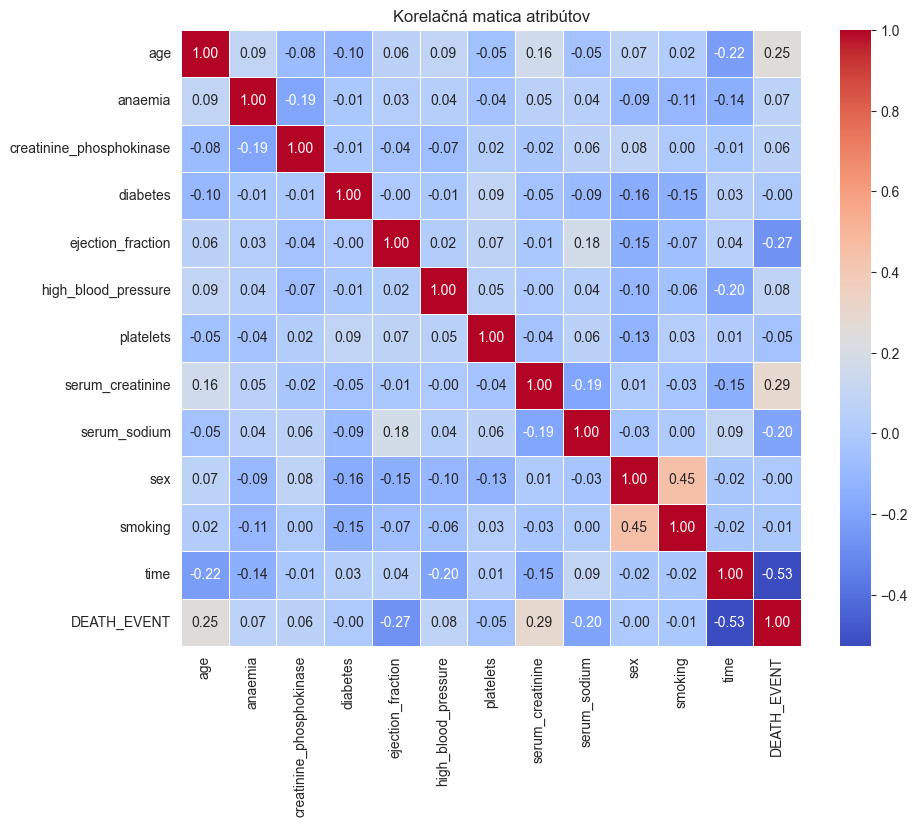

Dve dvojice atribútov s najväčšou zápornou koreláciou:
DEATH_EVENT        time          -0.526964
ejection_fraction  DEATH_EVENT   -0.268603
dtype: float64
Dvojica atribútov s najväčšou kladnou koreláciou:
sex               smoking        0.445892
serum_creatinine  DEATH_EVENT    0.294278
dtype: float64


In [27]:
# TODO

import seaborn as sns
import matplotlib.pyplot as plt

#1
numeric_data = data_hf.select_dtypes(include=['number'])

# Vytvorenie korelačnej matice
correlation_matrix = numeric_data.corr()

# Zobrazenie korelačnej matice pomocou heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Korelačná matica atribútov")
plt.show()


#2
correlation_matrix = numeric_data.corr()
correlation_pairs = correlation_matrix.unstack().sort_values()
negative_correlation_pairs = correlation_pairs[correlation_pairs < 0]
unique_negative_correlation_pairs = negative_correlation_pairs[::2]
lowest_correlation = unique_negative_correlation_pairs.head(2)


print("Dve dvojice atribútov s najväčšou zápornou koreláciou:")
print(lowest_correlation)



#3
correlation_matrix = numeric_data.corr()


correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # Odstráni diagonálu
unique_positive_correlation_pairs = correlation_pairs[::2]  # Odstráni duplikáty
highest_correlation = unique_positive_correlation_pairs.head(2)


print("Dvojica atribútov s najväčšou kladnou koreláciou:")
print(highest_correlation)




**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure